# 2. Programación básica en Spark

El trabajo realizado en esta parte ha consistido en el seguimiento del tutorial de programación básica en Spark y en la respuesta justificada a las preguntas planteadas. Como estamos trabajando en un cuaderno, vamos a iniciar la sesión de Spark en el sistema y a obtener el entorno de ejecución de Spark en el Driver antes de nada.

In [1]:
!pip install pyspark

from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

APP_NAME = "PDGE-tutorialSpark1"
SPARK_URL = "local[*]"
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()
spark

sc = spark.sparkContext

#### Pregunta TS1.1 ¿Cómo hacer para obtener una lista de los elementos al cuadrado?

Similarmente al ejemplo planteado en la celda anterior del tutorial, al RDD `numeros` se le aplica la función `map` cuyo parámetro será la función `lambda x: x**2`. Esta función simplemente eleva cada elemento del RDD al cuadrado. Luego usamos `collect` para imprimir el resultado. El código es:

In [2]:
numeros = sc.parallelize([1,2,3,4,5,6,7,8,9,10])

rdd = numeros.map(lambda x: x**2)
print(rdd.collect())

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


#### Pregunta TS1.2 ¿Cómo filtrar los impares?

Ahora en lugar de usar la función `map` deberemos usar una función que filtre los valores deseados. En este caso utilizaremos `filter` que se aplicará a este RDD y se le introducirá como parámetro la función `lambda x: x\%2==1`. Esta función calcula el resto de cada uno de los elementos al ser divididos entre 2. Si el resto es 1 entonces los filtra y es así cómo se obtienen los valores impares de nuestro RDD original.

In [3]:
numeros = sc.parallelize([1,2,3,4,5,6,7,8,9,10])

rddi = numeros.filter(lambda x: x%2==1)
print(rddi.collect())

[1, 3, 5, 7, 9]


#### Pregunta TS1.3 Ejecute las siguientes celdas y conteste razonadamente. ¿Tiene sentido reduce con una resta en lugar de una suma? ¿Si se repite se obtiene siempre el mismo resultado?

El código proporcionado sobre el que se realizan las siguientes preguntas es:

In [4]:
# ¿Tiene sentido la reducción(elem1-elem2)?
numeros = sc.parallelize([1,2,3,4,5,6,7,8,9,10])

print (numeros.reduce(lambda elem1,elem2: elem1-elem2))
print (numeros.reduce(lambda elem1,elem2: elem1+elem2))

15
55


In [5]:
# ¿Tiene sentido la reducción(elem1-elem2)
# si la repetimos y los elementos están en otro orden?
numeros = sc.parallelize([2,1,4,3,5,6,7,8,9,10])

print (numeros.reduce(lambda elem1,elem2: elem1-elem2))
print (numeros.reduce(lambda elem1,elem2: elem1+elem2))

17
55


In [6]:
# ¿Tiene sentido la reducción(elem1-elem2)?
# ¿qué pasa si cambiamos la paralelización a 5? ¿y si es 2?
numeros5 = sc.parallelize([1,2,3,4,5,6,7,8,9,10],5)
numeros2 = sc.parallelize([1,2,3,4,5,6,7,8,9,10],2)

print (numeros5.reduce(lambda elem1,elem2: elem1-elem2))
print (numeros5.reduce(lambda elem1,elem2: elem1+elem2))
print (numeros2.reduce(lambda elem1,elem2: elem1-elem2))
print (numeros2.reduce(lambda elem1,elem2: elem1+elem2))

3
55
15
55


Como se puede comprobar, aunque el RDD inicial tenga los mismos elementos (números del 1 al 10) y la función `reduce` que se aplica tiene la misma función introducida como parámetro, el resultado no es el mismo en cada una de las situaciones. Esto es debido a que el segundo caso se modifica el orden de los elementos y en el tercero se especifica el número de muestras en las que realizar la operación de forma paralela.

Esto ocurre ya que esta operación de resta de elementos no tiene sentido hacerla puesto que no es conmutativa y al aplicar `reduce` es necesario esta propiedad de la función a reducir. Por eso mismo los resultados no son iguales.

Como se puede ver, para la operación de suma sí que se obtiene el mismo resultado en las tres ocasiones ya que sí que es conmutativa y no importa el orden de los elementos o el número de muestras paralelas para obtener el mismo resultado.

#### Pregunta TS1.4 ¿Cómo lo ordenarías para que primero aparezcan los impares y luego los pares?

Para reordenar los elementos de un RDD para que aparezcan primero los números impares y luego los números pares utilizamos la función `takeOrdered`. Esta función ordena un número $n$ de elemetos según una función que se le introduce.

Se utiliza `count` para que se ordenen todos los elementos del RDD siguiendo la función a introducir. Si en vez de `count` utilizáramos un número $m$, se ordenarían los $m$ primeros elementos del RDD.

Esta función que se introduce es `lambda x:x%2` que calcula el resto de cada elemento al ser dividido entre 2. Por tanto, asignará un 0 a los valores pares y un 1 a los valores impares. A partir de esto `takeOrdered` ordenará los elementos del RDD tomando primero los elementos con valores menores (los 0) y luego los elementos con valores mayores (los 1). Así apareceran primero los pares y luego los impares.

In [7]:
numeros = sc.parallelize([3,2,1,4,5])

print(numeros.takeOrdered(numeros.count(), lambda elem: elem%2))

[2, 4, 3, 1, 5]


#### Pregunta TS1.5 ¿Cuántos elementos tiene cada RDD? ¿Cuál tiene más?

El RDD a los que se refieren son:

In [8]:
lineas = sc.parallelize(['', 'a', 'a b', 'a b c'])

palabras_flat = lineas.flatMap(lambda elemento: elemento.split())
palabras_map = lineas.map(lambda elemento: elemento.split())

print (palabras_flat.collect())
print (palabras_map.collect())

['a', 'a', 'b', 'a', 'b', 'c']
[[], ['a'], ['a', 'b'], ['a', 'b', 'c']]


Para calcular cuántos elementos tiene cada RDD utilizamos `count`, que cuenta el número de elementos del RDD.

In [9]:
print (palabras_flat.count())
print (palabras_map.count())

6
4


Como se puede comprobar, `palabras_flat` tiene más elementos que `palabras_map`. Esto es así porque la función `lambda` que se le introduce a `map` se aplica a los elementos del RDD mientras que la función introducida en `flatMap` se le aplica a cada elemento dentro de los que forman del RDD (que pueden ser vectores conteniendo varios elementos y por eso tiene más elementos que la aplicación de `map` simplemente).

De esta forma tenemos que con `flatMap` introducimos cada elemento de `lineas` en un vector cuyos elementos son separados en los elementos que los forman (elimina la característica vectorial de los elementos del RDD inicial) y a los que se applica `lambda` a cada uno de estos elementos. Es por eso que el elemento vacío desaparece y se aumenta el número de elementos iniciales.

Con `map` a cada elemento de `lineas` se le aplica la función directamente y el resultado de esta función se introduce en un vector. Este vector es el resultado final cuyos elementos a su vez pueden ser vectores. De esta forma se separan los elementos de los elementos del RDD de entrada. Por tanto, al aplicar `map` siempre se obtiene un RDD con tantos elementos como el RDD de entrada.

#### Pregunta TS1.6 ¿De qué tipo son los elementos del RDD `palabras_map`? ¿Por qué `palabras_map` tiene el primer elemento vacío?

Como se ha comentado en la pregunta anterior, en `palabras_map` se obtiene un vector después de haber aplicado la función `lambda` a cada uno de los elementos del RDD de entrada `lineas`. Por tanto, los elementos del RDD `palabras_map` son vectores. Esto también se puede deducir de observar que el resultado de `palabras_map.collect()` son elementos [ ], que indican que son arrays de python.

El primer elemento de `palabras_map` es un elemento vacío ya que cuando se aplica la función `split` al elemento `''` de `lines`, al no haber nada que separar se devuelve un vector vacío.

#### Pregunta TS1.7. Prueba la transformación `distinct` si lo aplicamos a cadenas.

Aplicamos la transformación al RDD indicado:

In [10]:
log = sc.parallelize(['E: e21', 'I: i11', 'W: w12', 'I: i11', 'W: w13', 'E: e45'])

dis = log.distinct()
print (dis.collect())

['I: i11', 'W: w12', 'W: w13', 'E: e45', 'E: e21']


Lo que esta función hace es devolver un nuevo RDD que contiene los elementos del RDD de entrada que no se repiten en el mismo. Así, los elementos duplicados se eliminan. Esto implica que al comparar los elementos de tipo string de un RDD se comparan caracter a caracter, no se paralelizan estos elementos.

#### Pregunta TS1.8 ¿Cómo se podría obtener la misma salida pero utilizando una sola transformación y sin realizar la unión?

Esta pregunta hace referencia a la operación:

In [11]:
log = sc.parallelize(['E: e21', 'I: i11', 'W: w12', 'I: i11', 'W: w13', 'E: e45'])

infos = log.filter(lambda elemento: elemento[0]=='I')
errors = log.filter(lambda elemento: elemento[0]=='E')

inferr = infos.union(errors)

print (inferr.collect())

['I: i11', 'I: i11', 'E: e21', 'E: e45']


Para hacerlo en una sola transformación, introducimos las dos condiciones en una sola fución `lambda`. Una posibilidad es la siguiente:

In [12]:
log = sc.parallelize(['E: e21', 'I: i11', 'W: w12', 'I: i11', 'W: w13', 'E: e45'])

inferr = log.filter(lambda elemento: elemento[0]=='I' or elemento[0]=='E')

print (inferr.collect())

['E: e21', 'I: i11', 'I: i11', 'E: e45']


Así obtenemos el mismo resultado que anteriormente pero utilizando solamente una función (y sin realizar la unión).

#### Pregunta TS1.9 ¿Cómo explica el funcionamiento de las celdas anteriores?

Las celdas a las que hace referencia esta pregunta son las que están en formato code.

In [13]:
numeros = sc.parallelize([1,2,3,4,5])

print (numeros.reduce(lambda elem1,elem2: elem2+elem1))
print (numeros.reduce(lambda elem1,elem2: elem2-elem1))

15
3


In [14]:
palabras = sc.parallelize(['HOLA', 'Que', 'TAL', 'Bien'],2)

pal_minus = palabras.map(lambda elemento: elemento.lower())

print (pal_minus.reduce(lambda elem1,elem2: elem1+"-"+elem2))
print (pal_minus.reduce(lambda elem1,elem2: elem2+"-"+elem1))

# Otro ejemplo de paralelización
palabras = sc.parallelize(['HOLA', 'Que', 'TAL', 'Bien'],4)

pal_minus = palabras.map(lambda elemento: elemento.lower())

print (pal_minus.reduce(lambda elem1,elem2: elem1+"-"+elem2))
print (pal_minus.reduce(lambda elem1,elem2: elem2+"-"+elem1))

hola-que-tal-bien
bien-tal-que-hola
hola-que-tal-bien
bien-tal-que-hola


En este ejemplo se puede entender la diferencia entre el uso de `map` y `reduce` para floats y strings.

Como se ha comentado, el uso de `reduce` para floats solo tiene sentido si la operación es conmutativa pues al paralelizar se pierde la información del orden de los elementos y por tanto, la suma siempre nos devuelve el mismo resultado pero la resta nos devuelve resultados diferentes en función del número de grupos en los que se divide el RDD para paralelizar y del orden de los elementos del RDD.

El uso de `map` en nuestro RDD de strings aplica la función de parámetro `lambda` (en nuestro caso pasar todas las mayúsculas a minúsculas) a los elementos de nuestro RDD. Esto lo hace para cada caracter del elemento. El uso de `reduce` aplica la función de parámetro `lambda` (en nuestro caso unir los elementos contiguos en orden ascendente u orden descendente creando un solo string unidos por guiones) a los elementos del RDD devuelto tras `map`.

Sin embargo, como se ve en el ejemplo mostrado, en el caso de strings sí que se mantiene el orden de los elementos al realizar `map` sin importar el número de grupos que se divide para paralelizar, y por tanto se obtienen los mismos resultados, a diferencia del caso de la resta. Esto no ocurre si cambiamos el orden de los elementos, similar al caso de la resta.

In [15]:
r = sc.parallelize([('A', 1),('C', 4),('A', 1),('B', 1),('B', 4)])
rr = r.reduceByKey(lambda v1,v2:v1+v2)
print (rr.collect())

[('C', 4), ('A', 2), ('B', 5)]


In [16]:
r = sc.parallelize([('A', 1),('C', 4),('A', 1),('B', 1),('B', 4)])
rr1 = r.reduceByKey(lambda v1,v2:v1+v2)
print (rr1.collect())
rr2 = rr1.reduceByKey(lambda v1,v2:v1)
print (rr2.collect())

# Otro ejemplo de reduceByKey
rr2 = r.reduceByKey(lambda v1,v2:v1)
print (rr2.collect())

[('C', 4), ('A', 2), ('B', 5)]
[('C', 4), ('A', 2), ('B', 5)]
[('C', 4), ('A', 1), ('B', 1)]


En estos casos, el RDD de entrada tiene como elementos tuplas (que contienen pares clave-valor).

Para el primer caso, mediante el uso de `reduceByKey` y de la función `lambda v1,v2:v1+v2` se agregan los valores de las tuplas que contienen la misma clave (en nuestro caso letras). De esta forma se obtiene como salida un RDD cuyos elementos son tuplas, que conservan los mismos valores para las claves y que los valores se han sumado, resultado los valores en el total de la suma de los valores para cada clave.

Para el segundo caso, mediante el uso de `ReducebyKey` al RDD de salida de la celda previa se aplica la función `lambda v1,v2:v1` que simplemente devuelve el primer valor e ignora el resto. Es decir, que cuando hay varios valores para una misma clave, se reduce únicamente tomando el primer valor y se descarta el resto de valores. Como ya no hay valores duplicados por clave en el RDD nuevo, esta operación no cambia los valores para `rdd1` porque no hay más de un valor para reducir. Sin embargo, si hacemos esta operación para el RDD `r` lo que observamos es lo descrito justamente, que únicamente se devuelven los primeros valores asociados a las claves, descartando el resto y conservando el valor inicial.

Es importante saber aplicar la función `reduce` correctamente sobre los RDD puesto que dependiendo de la operación que se realice se pueden obtener resultados que no son los esperados o deseados.



#### TS1.10 Responda a las preguntas planteadas al hacer los cambios sugeridos en las siguiente celdas.

##### ¿Qué operación se puede realizar al RDD `rr` para que la operación sea como un `reduceByKey`? ¿Y simular un `groupByKey` con un `reduceByKey` y un `map`?

In [17]:
r = sc.parallelize([('A', 1),('C', 2),('A', 3),('B', 4),('B', 5)])
rr = r.groupByKey()
res = rr.collect()

for k,v in res:
    print (k, list(v))

C [2]
A [1, 3]
B [4, 5]




Ahora se utiliza la función `groupByKey` en lugar de `reduceByKey`. Esta función lo que hace, si no se le pasa ninguna función parámetro es, como su nombre indica, juntar los valores por clave. Ya no los agrega como en el caso anterior sino que devuelve una tupla clave-lista donde en la lista se guardan los valores de los elementos que comparten una misma clave (técnicamente no son tuplas clave-lista sino clave-pyspark.resultiterable.ResultIterable object. Estos iterables se pasan a una lista (es lo que hace el bucle `for`) y luego son mostrados).

Para que la operación `groupByKey` se parezca a lo que hace `reduceByKey` deberíamos sumar los valores de cada clave (o realizar una operación de reducción) ya que `reduceByKey` toma todos los valores de una clave y los combina agregándolos. Para ello, podemos aplicar la función `mapValues` y le pasamos como argumento una función que sume los valores de cada grupo.

De forma similar, se puede utilizar la función `map` tras usar `groupByKey` para asignar a cada tupla un elemento de un vector, para la clave se asigna el 0 y para la lista se le asigna el 1. De esta forma, luego aplicamos `sum` a los elementos 1 de los vectores mediante otra función `map` para que se sumen estos elementos de las listas. Es esto precisamente lo que aplica `mapValues` pero de forma más primaria, ya que solo estamos utilizando funciones `map`.

Se muestran los resultados de los dos métodos descritos:

In [18]:
r = sc.parallelize([('A', 1),('C', 2),('A', 3),('B', 4),('B', 5)])

rr = r.groupByKey()
res1 = rr.mapValues(lambda v: sum(v))
print(res1.collect())

[('C', 2), ('A', 4), ('B', 9)]


In [19]:
r = sc.parallelize([('A', 1),('C', 2),('A', 3),('B', 4),('B', 5)])

rr = r.groupByKey()
res1 = rr.map(lambda v: (v[0], list(v[1])))
res2 = res1.map(lambda v: (v[0], sum(v[1])))
print(res2.collect())

[('C', 2), ('A', 4), ('B', 9)]


Ambos hacen exactamente lo mismo, que era lo que buscábamos, una simulación de `reduceByKey`.

Ahora, para simular un `groupByKey` utilizando `reduceByKey` y la lista que recoge los valores podemos utilizar `map` que convierte los valores en listas y luego utilizar `reduceByKey` que concatena los valores en esas listas juntándolos por clave. Así se obtiene:

In [20]:
r = sc.parallelize([('A', 1),('C', 2),('A', 3),('B', 4),('B',5)])

res2 = r.map(lambda x: (x[0], x[1])).reduceByKey(lambda v1,v2: [v1,v2])
print(res2.collect())

[('C', 2), ('A', [1, 3]), ('B', [4, 5])]


Que hace la misma operación que veíamos antes con `groupByKey`.

##### Prueba a cambiar las claves del rdd1 y rdd2 para ver cuántos elementos se crean

In [21]:
rdd1 = sc.parallelize([('A',1),('B',2),('C',3)])
rdd2 = sc.parallelize([('A',4),('B',5),('C',6)])

rddjoin = rdd1.join(rdd2)

print (rddjoin.collect())

# Cambio de las claves
rdd1 = sc.parallelize([('A',1),('B',2),('C',3)])
rdd2 = sc.parallelize([('A',4),('D',5),('B',6)])

rddjoin = rdd1.join(rdd2)

print (rddjoin.collect())

[('A', (1, 4)), ('B', (2, 5)), ('C', (3, 6))]
[('A', (1, 4)), ('B', (2, 6))]


Cuando se aplica la función `join` sobre un RDD, el resultado devuelto son tuplas que contienen los valores agrupados por clave. Al cambiar la clave, se observa que aquellas claves que únicamente tienen un valor asociado son descartadas, y por tanto, la función `join` solamente junta los elementos del RDD que comparten clave y descarta aquellos que tienen claves únicas.

La función `join` hace la unión de dos RDD cuyas claves son compartidas entre sí. Ni `C` y `D` se encuentran en ambos por lo que no aparecen en el RDD de salida final.

##### Modifica `join` por `leftOuterJoin`, `rightOuterJoin` y `fullOuterJoin`. ¿Qué sucede?

In [22]:
# join por leftOuterJoin
rdd1 = sc.parallelize([('A',1),('B',2),('C',3)])
rdd2 = sc.parallelize([('A',4),('A',5),('B',6),('D',7)])

rddjoin = rdd1.leftOuterJoin(rdd2)

print (rddjoin.collect())

# join por rightOuterJoin
rdd1 = sc.parallelize([('A',1),('B',2),('C',3)])
rdd2 = sc.parallelize([('A',4),('A',5),('B',6),('D',7)])

rddjoin = rdd1.rightOuterJoin(rdd2)

print (rddjoin.collect())

# join por fullOuterJoin
rdd1 = sc.parallelize([('A',1),('B',2),('C',3)])
rdd2 = sc.parallelize([('A',4),('A',5),('B',6),('D',7)])

rddjoin = rdd1.fullOuterJoin(rdd2)

print (rddjoin.collect())

[('A', (1, 4)), ('A', (1, 5)), ('B', (2, 6)), ('C', (3, None))]
[('A', (1, 4)), ('A', (1, 5)), ('B', (2, 6)), ('D', (None, 7))]
[('A', (1, 4)), ('A', (1, 5)), ('B', (2, 6)), ('C', (3, None)), ('D', (None, 7))]


Según el tipo de `join` utilizado, se obtiene un RDD de salida diferente:
* `leftOuterJoin`: al nuevo RDD se añaden las tuplas clave-valor cuya clave se encuentra en el RDD sobre el que se llama la función pero que no estén en el RDD de parámetro. Si hay una clave en el RDD sobre el que se llama la función pero no se encuentra en el RDD que se pasa como parámetro se añade `None` en la tupla del RDD final con la clave del RDD sobre el que se pasa la función.
* `rightOuterJoin`: al nuevo RDD se añaden las tuplas clave-valor cuya clave se encuentra en el RDD de parámetro pero que no estén en el RDD sobre el que se llama la función. Si hay una clave en el RDD sobre el que se pasa como parámetro pero no se encuentra en el RDD sobre el que se llama la función se añade `None` en la tupla del RDD final con la clave del RDD que se pasa como parámetro. Es similar a `leftOuterJoin` pero en sentido opuesto.
* `fullOuterJoin`: al nuevo RDD se añaden las tuplas clave-valor cuya clave se encuentra en el RDD sobre el que se llama la función y también se añaden las clases que estén en el RDD de parámetro. Si hay una clave en el RDD sobre el que se llama la función pero no se encuentra en el RDD que se pasa como parámetro, o viceversa, se añade `None` en la tupla del RDD final con la clave del RDD sobre el que se pasa la función y viceversa.


#### Pregunta TS1.11 Borra la salida y cambia las particiones en `parallelize`. ¿Qué sucede?

In [23]:
# Borramos el contenido del directorio
!rm -r /content/salida

numeros = sc.parallelize(range(0,1000),8)
numeros.saveAsTextFile('salida')

%ls -la salida/*

-rw-r--r-- 1 root root 390 Oct 15 17:11 salida/part-00000
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00001
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00002
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00003
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00004
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00005
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00006
-rw-r--r-- 1 root root 500 Oct 15 17:11 salida/part-00007
-rw-r--r-- 1 root root   0 Oct 15 17:11 salida/_SUCCESS


Una vez hemos corrido el código y hemos cambiado el número de particiones, si realizamos 8 particiones de nuestro RDD y lo guardamos como ficheros de texto (siempre y cuando hayamos borrado anteriormente el contenido del directorio donde tenemos la salida), como era de esperar, se han creado 8 archivos, uno para cada una de las particiones de salida.

## 2.1 El Quijote

#### Pregunta TS2.1 Explica la utilidad de cada transformación y detalle para cada una de ellas si cambia el número de elementos en el RDD resultante. Es decir si el RDD de partida tiene $N$ elementos, y el de salida $M$ elementos, indica si $N>M$, $N=M$ o $N<M$.

Dado el código:

In [24]:
quijote = sc.textFile("quijote.txt")

charsPerLine = quijote.map(lambda s: len(s))
allWords = quijote.flatMap(lambda s: s.split())
allWordsNoArticles = allWords.filter(lambda a: a.lower() not in ["el", "la"])
allWordsUnique = allWords.map(lambda s: s.lower()).distinct()
sampleWords = allWords.sample(withReplacement=True, fraction=0.2, seed=666)
weirdSampling = sampleWords.union(allWordsNoArticles.sample(False, fraction=0.3))

Vamos primero a explicar la función de cada una de las transformaciones aplicadas al texto. Es necesario conocer que el texto de El Quijote es un RDD cuyos elementos son strings que representan las filas del texto.

* `charsPerLine = quijote.map(lambda s: len(s))`: esta transformación obtiene un nuevo RDD que cambia cada línea del texto de El Quijote por la longitud de la línea. Este RDD contiene el mismo número de elementos que el texto originial, es decir, que $N=M$.

* `allWords = quijote.flatMap(lambda s: s.split())`: esta transformación obtiene un nuevo RDD que separa cada uno de los strings del texto original en cada una de las palabras que lo forman. Luego, cada palabra se convierte en un elemento del nuevo RDD (es lo que vimos en la pregunta 5 anterior, cómo se comportaba `flatMap`). Este nuevo RDD contiene más elementos que el RDD de entrada por lo que $N<M$.

* `allWordsNoArticles = allWords.filter(lambda a: a.lower() not in ["el", "la"])`: esta transformación obtiene un nuevo RDD que toma el RDD que posee las palabras separadas (el RDD `allWords`) y elimina todos los artículos "el" y "la" de dicho RDD (tanto los que se encuentran en mayúscula como los que se encuentran en minúscula, gracias a `lower`). Como se eliminan algunos elementos, el número de elementos del RDD de salida es menor que el número de elementos del RDD de entrada y por tanto, $N>M$.

* `allWordsUnique = allWords.map(lambda s: s.lower()).distinct()`: esta transformación obtiene un nuevo RDD que toma el RDD que posee las palabras separadas (el RDD `allWords`) y elimina todas las palabras repetidas de forma que los elementos que lo forman son palabras distintas (tanto los que se encuentran en mayúscula como los que se encuentran en minúscula, gracias a `lower`). Como se eliminan algunos elementos, el número de elementos del RDD de salida es menor que el número de elementos del RDD de entrada y por tanto, $N>M$.

* `sampleWords = allWords.sample(withReplacement=True, fraction=0.2, seed=666)`: esta transformación obtiene un nuevo RDD que toma el RDD que posee las palabras separadas (el RDD `allWords`) y extrae de forma aleatoria (usando `sample`) un 20% de las palabras que hay en el RDD de entrada pero con reemplazo, es decir, que se selecciona un elemento para escoger y más adelante se podría vovler a seleccionar. De esta forma, se crea un nuevo RDD de tamaño $M=0.2N$ y por tanto, $N>M$.

* `weirdSampling = sampleWords.union(allWordsNoArticles.sample(False, fraction=0.3))`: esta transformación obtiene un nuevo RDD que toma el RDD que se ha obtenido filtrando los artículos (el RDD `allWordsNoArticles`) y extrae de forma aleatoria (usando `sample`) un 30% de las palabras que hay en este RDD de entrada pero sin reemplazo, es decir, que se selecciona un elemento para escoger y no se podría vovler a seleccionar. Luego realiza la unión de este RDD de palabras sin artículos filtrado y del RDD de palabras seleccionadas aleatoriamente `sampleWords`. Debido a esta unión, el RDD de salida es más grande que el RDD de entrada `sampleWords` puesto que se le añade un RDD con muchos elementos. Por tanto, $N<M$.

Ahora se va a explicar el uso de las funciones indicadas y si en general cambia el número de elementos del RDD de salida:

* `map`: hace una transformación del RDD pasándole una función como parámetro. La transformación depende de la función que se introduce como parámetro. El número de elementos del RDD de salida es el mismo que el del RDD de entrada ya que aplica la función elemento a elemento y no se elimina o se crean nuevos elementos por lo que $N=M$.

* `flatMap`: hace una transformación del RDD pasándole una función como parámetro. La transformación depende de la función que se introduce como parámetro. Si los elementos son vectores, hace que cada término del vector sea un elemento nuevo del RDD por lo que el número de elementos del RDD de salida es mayor o igual (si todos los vectores tienen dimensión 1). Así, $N \leq M$

* `filter`: selecciona un conjunto de elementos en función de la función que se le pasa como parámetro, que representa una condición. Como dicha condición la pueden cumplir todos o solo un subconjunto de elementos, tenemos que $N\leq M$.

* `distinct`: selecciona los elementos del RDD que son diferentes a los demás, los que no se repiten (los únicos). Como esto puede ocurrir para todos los elementos o solo un suboconjunto de ellos tenemos que $N \leq M$.

* `sample`: selecciona de forma aleatoria una muestra de elementos del RDD de entrada. El tamaño de esta muestra puede ser igual al número original o menor si se especifica tomar una selección de elementos menor. Por tanto, $N \leq M$.

* `union`: toma un RDD y lo une a otro diferente, según una condición que se le pasa como parámetro. En general, la unión de estos dos RDD produce uno de mayor tamaño y por tanto, $N \leq M$.

#### Pregunta TS2.2 Explica el funcionamiento de cada acción anterior.

La celda a la que hace referencia es:

In [25]:
numLines = quijote.count()
numChars = charsPerLine.reduce(lambda a,b: a+b) # also charsPerLine.sum()
sortedWordsByLength = allWordsNoArticles.takeOrdered(20, key=lambda x: -len(x))
numLines, numChars, sortedWordsByLength

(5534,
 305678,
 ['procuremos.Levántate,',
  'estrechísimamente,',
  'Pintiquiniestra,',
  'entretenimiento,',
  'maravillosamente',
  'descansadamente;',
  'desenfadadamente',
  'quebrantamientos',
  'quebrantamiento,',
  'alternativamente',
  'encantamientos,',
  'Placerdemivida,',
  'encantamientos;',
  'malbaratándolas',
  'regocijadamente',
  'consentimiento,',
  'desaconsejaban,',
  'acontecimiento.',
  'agradeciéndoles',
  'encantamientos,'])

Similarmente a la pregunta anterior, vamos a estudiar línea a línea las acciones anteriores:

* `numLines = quijote.count()`: esta transformación obtienea partir del RDD original, que contiene el texto de El Quijote por filas, el número de elementos del RDD (en este caso el número de líneas que tiene El Quijote).

* `numChars = charsPerLine.reduce(lambda a,b: a+b)`: esta transformación obtiene un nuevo RDD que toma el RDD del ejercicio anterior, cuyos elementos la longitud de cada una de las líneas de El Quijote y las suma, obteniendo así el número de caracteres totales.

* `sortedWordsByLength = allWordsNoArticles.takeOrdered(20, key=lambda x: -len(x))`: esta transformación obtiene un nuevo RDD que toma el RDD del ejercicio anterior, cuyos elementos son todas las palabras de El Quijote excepto los artículos "el" y "la" y toma las 20 palabras (claves) que tienen una mayor longitud (debido al `-len(x)`), como se muestra en la pantalla.

Implementa la opción `count` de otra manera:


* Utilizando transformaciones `map` y `reduce`.
* Utilizando solo `reduce` en caso de que sea posible.

In [26]:
# Implementación de count usando map y reduce
numLines = quijote.map(lambda s: 1).reduce(lambda a,b: a+b)
print(numLines)

# Implementación de count usando solo reduce
# Debemos crear una función que se introduzca como parámetro a reduce que
# transforme los elementos del RDD a 1s
def f(a,b):
  elem1 = 1 if type(a)==str else a
  elem2 = 1 if type(b)==str else b
  return elem1+elem2

"""
quijote = ['Primera línea', 'Segunda línea', 'Tercera línea']
f('Primera línea', 'Segunda línea') → 1 + 1 → devuelve 2
Ahora, reduce() toma el resultado anterior (2) y lo aplica a la siguiente fila:
f(2, 'Tercera línea') → 2 + 1 → devuelve 3.
"""

numLines = quijote.reduce(f)
print(numLines)


5534
5534


Como se puede comprobar, los resultados en ambas situaciones son los mismos y también son iguales al resultado de `count`, por lo que se ha implementado de forma correcta.

#### Pregunta TS2.3 Explica el propósito de cada una de las operaciones anteriores.

Las operaciones anteriores se refieren al código mostrado en las diferentes celdas que aparecen a continuación.

In [27]:
import requests
import re
allWords = allWords.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.lower()).split(" ")).filter(lambda a: len(a)>0)
allWords2 = sc.parallelize(requests.get("https://gist.githubusercontent.com/jsdario/9d871ed773c81bf217f57d1db2d2503f/raw/585de69b0631c805dabc6280506717943b82ba4a/el_quijote_ii.txt").iter_lines())
allWords2 = allWords2.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.decode("utf8").lower()).split(" ")).filter(lambda a: len(a)>0)

print(allWords.take(10))
print(allWords2.take(10))

['el', 'ingenioso', 'hidalgo', 'don', 'quijote', 'de', 'la', 'mancha', 'miguel', 'de']
['don', 'quijote', 'de', 'la', 'mancha', 'miguel', 'de', 'cervantes', 'saavedra', 'segunda']


En este código se importa la librería `request` que sirve para hacer peticiones en internet y la librería `re` que sirve para trabajar con expresiones regulares. Luego se crean dos RDD.

En el primero (`allWords`), sus elementos son las palabras que componen el texto de El Quijote que hemos estado trabajando (se utiliza `flatMap` para pasar de elementos de líneas a elementos de palabras) pero se eliminan todos los caracteres que no forman palabras (puntos, comas, dos puntos, comillas...). En el segundo (`allWords2`), se escoge un texto de internet que contiene la segunda parte de El Quijote y se paraleliza creando un RDD. Luego, se obtienen todas sus palabras utilizando `flatMap` y se eliminan como en el caso anterior todos los caracteres que no forman parte de ninguna palabra. Así, se obtienen dos RDD cuyos elementos son las líneas en formato de string de la primera y de la segunda parte de El Quijote.

Finalmente se muestran los 10 primeros elementos de cada uno de los RDD creados, es decir, las 10 primeras palabras de cada uno de los textos.

In [28]:
words = allWords.map(lambda e: (e,1))
words2 = allWords2.map(lambda e: (e,1))
words.take(10)

[('el', 1),
 ('ingenioso', 1),
 ('hidalgo', 1),
 ('don', 1),
 ('quijote', 1),
 ('de', 1),
 ('la', 1),
 ('mancha', 1),
 ('miguel', 1),
 ('de', 1)]

En esta celda se crean dos RDD nuevos que toman los dos RDD anteriores y se transforman en tuplas clave-valor, cada clave (palabra) tomando un 1 como valor. Se muestran luego los 10 primeros elementos de un RDD.

In [29]:
frequencies = words.reduceByKey(lambda a,b: a+b)
frequencies2 = words2.reduceByKey(lambda a,b: a+b)
frequencies.takeOrdered(10, key=lambda a: -a[1])

[('que', 3032),
 ('de', 2809),
 ('y', 2573),
 ('a', 1426),
 ('la', 1423),
 ('el', 1232),
 ('en', 1155),
 ('no', 903),
 ('se', 753),
 ('los', 696)]

En esta celda se crean dos RDD nuevos que, a partir de las tuplas clave-valor de los RDD de la celda anterior y de la aplicación de la operación `reduceByKey`, se suman los valores de todos los elementos de los RDD de entrada que comparten una misma clave y así se consigue un RDD de salida que contiene claves distintas y cuyo valor asociado es el número total de veces que aparece esa clave en cada uno de los RDD anteriores.

Luego se toma de un RDD de salida las 10 tuplas clave-valor con valores mayores mediante el uso de `takeOrdered` que ordena los valores de mayor a menor gracias a la función de parámetro que se le ha pasado.

In [30]:
res = words.groupByKey().takeOrdered(10, key=lambda a: -len(a))
res # To see the content, res[i][1].data

# for k,v in res:
#     print (k, list(v))

[('el', <pyspark.resultiterable.ResultIterable at 0x7d94dc2091b0>),
 ('hidalgo', <pyspark.resultiterable.ResultIterable at 0x7d94dc20bf10>),
 ('don', <pyspark.resultiterable.ResultIterable at 0x7d94dc20bd60>),
 ('mancha', <pyspark.resultiterable.ResultIterable at 0x7d94dc20bee0>),
 ('saavedra', <pyspark.resultiterable.ResultIterable at 0x7d94dc20be80>),
 ('que', <pyspark.resultiterable.ResultIterable at 0x7d94dc20bfd0>),
 ('condición', <pyspark.resultiterable.ResultIterable at 0x7d94dc25c070>),
 ('y', <pyspark.resultiterable.ResultIterable at 0x7d94dc25c0d0>),
 ('del', <pyspark.resultiterable.ResultIterable at 0x7d94dc25c130>),
 ('d', <pyspark.resultiterable.ResultIterable at 0x7d94dc25c190>)]

Este caso lo hemos visto en la sección anterior. Mediante el uso de `groupByKey` y a partir del RDD cuyos elementos son tuplas clave-valor, se obtienen juntan los elementos que comparten una misma clave pero el valor pasa a ser una lista que contiene los diferentes valores de los elementos que comparten una mimsa clave. Luego además se muestran los 10 primeros elementos de este nuevo RDD cuyos elementos son los pares clave-lista. Esta lista, como se comentó anteriormente, es en realidad un objeto iterable y para ver la lista explícitamente se debe utilizar el bucle `for` que está comentado, como se hizo en la sección anterior.

In [31]:
joinFreq = frequencies.join(frequencies2)
joinFreq.take(10)

[('el', (1232, 4394)),
 ('hidalgo', (14, 42)),
 ('don', (370, 1606)),
 ('mancha', (26, 101)),
 ('saavedra', (1, 1)),
 ('que', (3032, 10040)),
 ('y', (2573, 9650)),
 ('del', (415, 1344)),
 ('en', (1155, 4223)),
 ('cuyo', (11, 35))]

En esta celda se juntan los dos RDD creados anteriormente cuyos elementos eran las tuplas clave-valor, donde la clave son las palabras y el valor las frecuencias absolutas de dicha palabra, tanto para la parte primera como para la segunda. En este caso, se realiza un 'join' que junta los dos RDD y así los elementos del RDD de salida son tuplas clave-valor donde el valor es una lista que contiene dos números, la frecuencia absoluta de dicha clave en la primera y en la segunda parte de El Quijote. Luego se muestran los 10 primeros elementos de dicho RDD.

In [32]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('pieza', 0.8),
  ('corral', 0.8),
  ('rodela', 0.7777777777777778),
  ('curar', 0.75),
  ('valle', 0.75),
  ('entierro', 0.75),
  ('oh', 0.7142857142857143),
  ('licor', 0.7142857142857143),
  ('difunto', 0.7142857142857143),
  ('pago', 0.6666666666666666)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('paje', -0.9565217391304348),
  ('duque', -0.9565217391304348),
  ('blanca', -0.9565217391304348),
  ('gobernador', -0.9503105590062112),
  ('diego', -0.9459459459459459),
  ('tarde', -0.9428571428571428),
  ('mesmo', -0.9381443298969072),
  ('letras', -0.9354838709677419)])

En esta celda se crean dos RDD nuevos. Utilizando el RDD de salida anterior, se aplica una función para comparar las frecuencias entre los dos textos. La función que se pasa como parámetro es:

$\frac{N_1 - N_2}{N_1 + N_2}$

donde $N_1$ representa el primer valor de la lista de valores, es decir, la frecuencia absoluta de una palabra en el primer texto y $N_2$ es la frecuencia absoluta de esa misma palabra en el segundo texto. Este valor se calcula para cada palabra (cada clave) mediante la función `map`.

Una vez se calcula este valor para cada clave, que representa la frecuencia relativa de la palabra en los dos textos (+1.0 indica que dicha palabra solo aparece en el primer texto, 0.0 indica que aparece en los dos textos el mismo número de veces y -1.0 indica que dicha palabra aparece solo en el segundo texto), se muestran las 10 palabras que más aparecen en el primer texto en relación con el segundo y viceversa.

#### Pregunta TS2.4 ¿Cómo puede implementarse la frecuencia con `groupByKey` y transformaciones?

Para calcular la frecuencia con la que sale cada palabra mediante el uso de `groupByKey` y transformaciones de tipo `map` podemos utilizar un código como el siguiente:

In [33]:
res = words.groupByKey().mapValues(lambda x : sum(x))

res.take(10)

[('el', 1232),
 ('hidalgo', 14),
 ('don', 370),
 ('mancha', 26),
 ('saavedra', 1),
 ('que', 3032),
 ('condición', 16),
 ('y', 2573),
 ('del', 415),
 ('d', 14)]

Debemos partir del RDD que contiene como elementos las tuplas clave-valor que representan pares palabra-1 de El Quijote. A partir de este RDD, juntamos las palabras por clave utilizando `groupByKey` y luego sumamos todos los valores de la lista creada por `groupByKey` utilizando `mapValues`, como se hizo en la pregunta 10 del apartado anterior.

#### Pregunta TS2.5 ¿Cuál de las dos siguientes celdas es más eficiente? Justifique la respuesta.

Las celdas a las que se hace referencia son:

In [34]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('pieza', 0.8),
  ('corral', 0.8),
  ('rodela', 0.7777777777777778),
  ('curar', 0.75),
  ('valle', 0.75),
  ('entierro', 0.75),
  ('oh', 0.7142857142857143),
  ('licor', 0.7142857142857143),
  ('difunto', 0.7142857142857143),
  ('pago', 0.6666666666666666)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('paje', -0.9565217391304348),
  ('duque', -0.9565217391304348),
  ('blanca', -0.9565217391304348),
  ('gobernador', -0.9503105590062112),
  ('diego', -0.9459459459459459),
  ('tarde', -0.9428571428571428),
  ('mesmo', -0.9381443298969072),
  ('letras', -0.9354838709677419)])

In [35]:
result = joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1])))
result.cache()
result.takeOrdered(10, lambda v: -v[1]), result.takeOrdered(10, lambda v: +v[1])

([('pieza', 0.8),
  ('corral', 0.8),
  ('rodela', 0.7777777777777778),
  ('curar', 0.75),
  ('valle', 0.75),
  ('entierro', 0.75),
  ('oh', 0.7142857142857143),
  ('licor', 0.7142857142857143),
  ('difunto', 0.7142857142857143),
  ('pago', 0.6666666666666666)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('paje', -0.9565217391304348),
  ('duque', -0.9565217391304348),
  ('blanca', -0.9565217391304348),
  ('gobernador', -0.9503105590062112),
  ('diego', -0.9459459459459459),
  ('tarde', -0.9428571428571428),
  ('mesmo', -0.9381443298969072),
  ('letras', -0.9354838709677419)])

La respuesta intuitiva es que la segunda celda es más eficiente pues no estamos realizando la operación `map` dos veces sino que con solo una vez obtenemos los mismos resultados. De esta forma, la transformación que se realiza en el `map` (la suma, resta y división de los valores de los RDD de entrada) solo se realiza una vez, lo que resulta mucho más eficiente. Lo que hacemos es guardar el RDD una vez hemos aplicado `map` en el caché y luego para mostrar los 10 elementos ordenados para cada uno de los casos simplemente utilizamos este caché para acceder al RDD en vez de volver a computar la transformación.

## 3. Parte opcional

En esta parte vamos a utilizar la base de datos del CCKP (Climate Change Knowledge Portal) para obtener un dataset que contiene en las columnas el nombre del país y las temperaturas medias del aire en esos países, donde una columna guardará los datos para cada uno de los meses del año y la última columna guarda el dato anual. Estos datos están recogidos durante el periodo 1961-1999.

Durante el ejercicio se va a tratar de extraer información del dataset para calcular la temperatura media global (mediando entre todos los países) para cada mes. También se va a calcular la desviación típica para cada mes y se representarán dichas distribuciones para comparar las temperaturas entre los meses.

Para obtener la media y la distribución de todos los países del mundo para representar las distribuciones normales por meses debemos utilizar una fórmula para calcular la media y la desviación típica en paralelo. Además, vamos a tratar de optimizar el proceso y calcular todos los datos necesarios mediante pocas transformaciones.

Una vez tenemos el dataset en formato .csv, utilizando Spark es fácilmente de leer los datos ya que vienen separados por comas. Separaremos los datos mediante un `map` así se obtendrá un RDD cuyos elementos serán País, Temperatura Meses (12 elementos), Temperatura Anual de los cuales descartaremos el primero para calcular la media y la desviación de las temperaturas.

In [36]:
# Leemos el archivo csv
datos = sc.textFile("/content/historico.csv")

# Separamos las líneas
datos = datos.map(lambda x: x.split(";")[0:14])
datos.take(1)

[['AFG',
  '0.07',
  '2.11',
  '7.60',
  '13.37',
  '18.22',
  '23.20',
  '25.26',
  '23.77',
  '19.03',
  '12.99',
  '7.00',
  '2.43',
  '12.92']]

Una vez hemos obtenido cada línea por separado utilizamos `map` de nuevo para operar sobre los elementos y añadir a los valores su respesctiva clave para poder poder más adelante juntar los datos que compartan una misma clave para poder calcular las medias y las desviaciones.

In [37]:
# Lista de claves
claves = ['country', 'temp_jan', 'temp_feb', 'temp_mar', 'temp_apr', 'temp_may', 'temp_jun',
          'temp_jul', 'temp_aug', 'temp_sep', 'temp_oct', 'temp_nov', 'temp_dec', 'temp_year']

# Función para transformar cada lista en un par clave-valor
def kv_pais(lista_valores):
    return list(zip(claves, lista_valores))

datos_kv = datos.map(kv_pais)
datos_kv.take(1)

[[('country', 'AFG'),
  ('temp_jan', '0.07'),
  ('temp_feb', '2.11'),
  ('temp_mar', '7.60'),
  ('temp_apr', '13.37'),
  ('temp_may', '18.22'),
  ('temp_jun', '23.20'),
  ('temp_jul', '25.26'),
  ('temp_aug', '23.77'),
  ('temp_sep', '19.03'),
  ('temp_oct', '12.99'),
  ('temp_nov', '7.00'),
  ('temp_dec', '2.43'),
  ('temp_year', '12.92')]]

Una vez tenemos nuestro RDD, con los pares clave-valor preparados, debemos obtener la media y la desviación para cada mes. Para ello debemos aplicar dos pasos de transformación de los datos antes de poder realizar ningún cálculo:

1. Para empezar, debemos eliminar el primer dato de cada elemento de nuestro RDD ya que no contiene información sobre la temperatura y no podremos operar con estos datos. Utilizaremos para ello `flatMap`.

2. Para poder operar correctamente
sonre nuestros elementos, debemos pasar las temperaturas de strings a floats.

In [38]:
# Tomamos los valores a partir del primero (que contienen las temperaturas)
datos_temp = datos_kv.flatMap(lambda elem: elem[1:])

# Pasamos los valores de temperatura a floats
datos_temp = datos_temp.map(lambda x: (x[0], float(x[1])))
datos_temp.take(13)

[('temp_jan', 0.07),
 ('temp_feb', 2.11),
 ('temp_mar', 7.6),
 ('temp_apr', 13.37),
 ('temp_may', 18.22),
 ('temp_jun', 23.2),
 ('temp_jul', 25.26),
 ('temp_aug', 23.77),
 ('temp_sep', 19.03),
 ('temp_oct', 12.99),
 ('temp_nov', 7.0),
 ('temp_dec', 2.43),
 ('temp_year', 12.92)]

Ahora que nuestro RDD está compuesto únicamente por pares clave-valor, es muy sencillo operar sobre el mismo para obtener nuestra media y nuestra desviación.

Para empezar, debemos crear un RDD con el formato `(clave, (valor, valor**2, 1))`. Esto lo realizaremos mediante el uso de `map` haciendo que guarde la clave y luego se haga una lista con los valores (para calcular la media), los valores al cuadrado (para calcular la desviación) y 1 (para calcular el número total de elementos).

Una vez tenemos nuestro RDD modificado, debemos realizar el cálculo de los totales. Esto se realiza utilizando `reduceByKey` y provocando que de nuestra lista creada anteriormente se añadan los respectivos valores que comparten una misma clave y así nuestro RDD se reduce a 13 elementos con el formato `(clave, (suma_valor, suma_valor_sqr, length))`.

Una vez tenemos este RDD se puede calcular sencillamente la media y la desviación típica utilizando las fórmulas:

$\mu = \frac{1}{N}\sum^N_{i=1} v_i$

$\sigma = \sqrt{\frac{1}{N}\sum^N_{i=1} (v_i - \mu)^2}$

donde el sumatorio ya lo hemos realizado en el paso anterior, en el `reduceByKey`. Este cálculo se realiza para cada elemento utilizando `mapValues` (ya que ignoramos las claves para el cálculo) y el RDD resultante es un RDD de 13 elementos que contiene el resultado de la media y desviación de las temperaturas agrupadas por meses (claves).

In [39]:
# Creamos el RDD en el formato (clave, (valor, 1))
datos_temp = datos_temp.map(lambda x: (x[0], (x[1], x[1]**2, 1)))

# Reducimos para calcular los totales
datos_temp = datos_temp.reduceByKey(lambda v1, v2: (v1[0]+v2[0], v1[1]+v2[1], v1[2]+v2[2]))
datos_mean_std = datos_temp.mapValues(lambda x: (
    x[0]/x[2],
    ((x[1]/x[2])-(x[0]/x[2])**2)**0.5
    ))

datos_calc = datos_mean_std.collect()
for row in datos_calc:
    print(row)

('temp_jan', (12.891348314606747, 13.2616467100789))
('temp_feb', (13.87921348314607, 12.932944234489003))
('temp_apr', (18.24056179775281, 9.34523730884029))
('temp_may', (20.15943820224719, 7.612833097754801))
('temp_jun', (21.3443820224719, 6.6764936392341045))
('temp_aug', (21.940898876404496, 6.004950044314931))
('temp_sep', (20.757415730337083, 6.701158298013359))
('temp_dec', (13.72938202247191, 12.288737154567949))
('temp_year', (17.965505617977527, 8.60357542755388))
('temp_mar', (15.934606741573036, 11.39657183386517))
('temp_jul', (22.008483146067412, 6.167508962318396))
('temp_oct', (18.70387640449438, 8.408109657181933))
('temp_nov', (15.992191011235958, 10.580688643267118))


Se ha calculado la media y la desviación estándar para poder observar las distribuciones de la temperatura por meses y poder compararlas. Sabemos que por el teorema central del límite, un conjunto de temperaturas de distintas regiones tiende a una distribución normal con cierta media y desviación típica. Así, podemos representar las distribuciones:

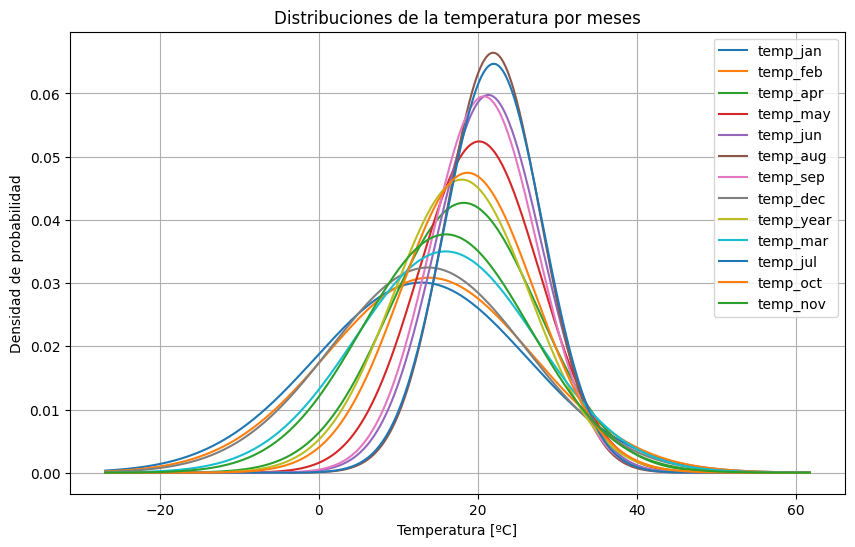

In [40]:
names = [item[0] for item in datos_calc]
means = [item[1][0] for item in datos_calc]
desvs = [item[1][1] for item in datos_calc]

# Función para calcular la función de densidad de probabilidad (PDF) de una distribución gaussiana
def gaussian_pdf(x, mean, std):
    return 1/(std*np.sqrt(2*np.pi)) * np.exp(-0.5*((x - mean)/std)**2)

x = np.linspace(min(means)-3*max(desvs), max(means)+3*max(desvs), 1000)


plt.figure(figsize=(10, 6))
for i in range(len(names)):
  mean = means[i]
  std = desvs[i]
  plt.plot(x, gaussian_pdf(x, mean, std), label=names[i])

plt.xlabel('Temperatura [ºC]')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones de la temperatura por meses')
plt.legend()

plt.grid(True)
plt.show()

Se puede observar que las temperaturas siguen una distribución similar a la de las temperaturas en el hemisferio norte puesto que existen una gran cantidad de países en esta región, que se intemponen a los países ecuatoriales o los del hemisferio sur (cuyas temperaturas son opuestas a las de los países en el hemisferio norte en verano e invierno). Esta descompensación, como mencionado, recae en el hecho que en el hemisferio norte existan una cantidad de países sustancialmente mayor, lo que provoca que las temperaturas sigan distribuciones compatibles con las que se dan en esta región.

Además, la distribución de la temperatura anual, que era la última columna de nuestro documento, es razonable pues recoge una distribución "media" de todos los meses, estando lejos de los meses más fríos (enero, febrero, diciembre...) y de los meses más cálidos (julio, agosto...).

Otra observación es que los meses más fríos tienden a tener una mayor desviación que los meses cálidos. Esto se debe a que además de existir más países en el hemisferio norte, estos se encuentran más al norte que lo que se encuentran al sur los países del hemisferio sur. Esto significa que por ejemplo en enero, los países del hemisferio sur tienen en promedio temperaturas muy frías y los países del hemisferio sur tienen temperaturas algo cálidas. En contraste, para julio, los países del hemisferio sur tienen temperaturas algo frías y los países del hemisferio norte tienen temperaturas algo cálidas, lo que provoca que estén "más cerca" entre sí y por tanto, que la desviación no sea tan importante como en los meses de invierno en el hemisferio norte.